# Notebook demonstrating the leakage effects of a time-limited pulse




* In a digital representation (DFT) the spectral resolution is dependent on the number of samples. When the digital signal is padded with a lot of zeros before and after, the DFT approaches the (infinite length in time domain) continous fourier transform.

* The DFT of just a pulse basically assumes that the signal is periodically extended with a period being the number of samples. Therefore the DFT of a pulse with added zeros before and after the pulse will be different than just the pulse.

* This is however not some artifact of the DFT. The real, continous pulse will exhibit the same spectral leakage effects. A "1kHz 1ms" pulse will always have several frequency components beyond just 1kHz.

* Spectra are just qualitative and use the python psd (power spectral density) function which plots the DFT hann windowed power-spectrum in dB from the lowest representable negative freq to the highest (Nyquist). 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=16)

In [20]:
# %% Helper functions

def upsample(data,factor):
    '''returns ideal upsampled data via zero padding in fft'''
    
    nr_zeros=int((factor-1)*len(data))       # nr zeros to pad
    data_fft=np.fft.fft(data)*factor
    data_fft_zp=np.append(data_fft[:int(len(data_fft)/2)],np.zeros(nr_zeros))
    data_fft_zp=np.append(data_fft_zp,data_fft[int(len(data_fft)/2):])
    
    return np.fft.ifft(data_fft_zp)  # upsampled sig

# Base pulse and fft

In [66]:
# %% FFT Coefficients

M=1024

a_m=np.zeros(M,dtype=complex)   # complex fft parameters

# real cosine at 100s freq.
a_m[100] = M/2   
a_m[-100] = M/2     

# %% Parameters

N=100   # upsampling factor (influences upsampling filter cutoff and spectral/temporal resolution)

pad=2   # number of samples in pulselengths to pad before and after the pulse

Text(0.5, 1.0, 'FFT')

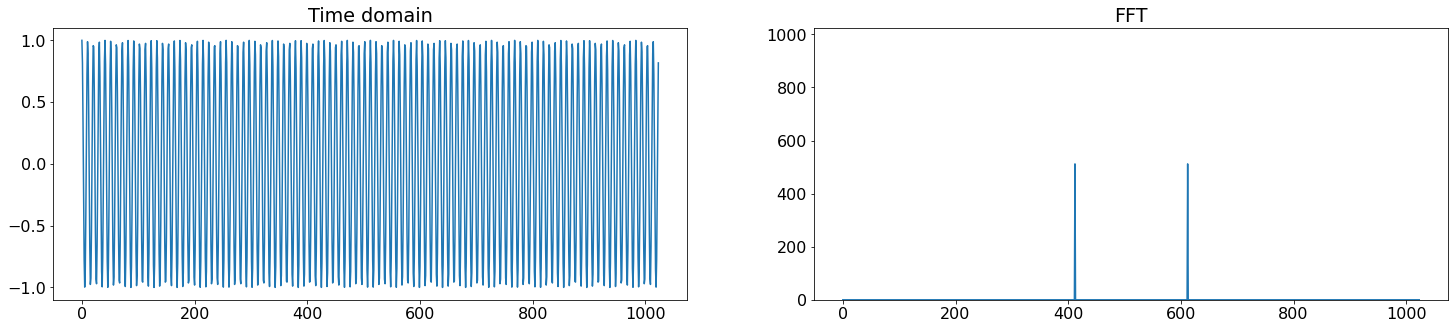

In [63]:
STFT_block=np.fft.ifft(a_m)

fig,ax = plt.subplots(1, 2,figsize=(25,5))
ax[0].plot(STFT_block.real)
ax[0].set_title('Time domain')
ax[1].plot(np.fft.fftshift(np.fft.fft(STFT_block).real))
ax[1].set_ylim(0,M)
ax[1].set_title('FFT')

# Hard square pulse

Text(0.5, 1.0, 'Zoomed spectrum')

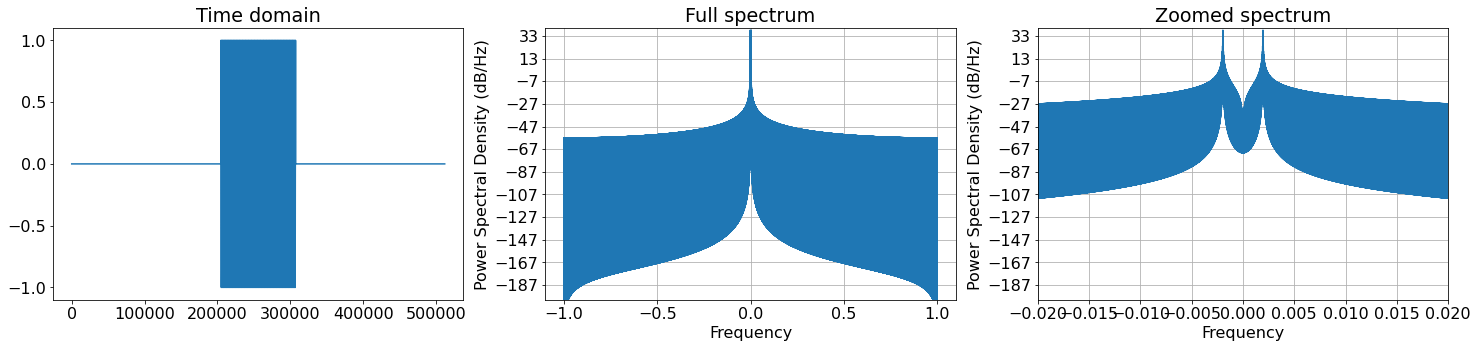

In [76]:
sig_us=upsample(STFT_block,N)

sig_us_pad=np.pad(sig_us,pad*M*N)   # signal first upsampled and then padded

fig,ax = plt.subplots(1, 3,figsize=(25,5))
ax[0].plot(sig_us_pad.real)
ax[0].set_title('Time domain')
ax[1].psd(sig_us_pad,len(sig_us_pad))
ax[1].set_ylim(-200,40)
ax[1].set_title('Full spectrum')
ax[2].psd(sig_us_pad,len(sig_us_pad))
plt.xlim(-0.02,0.02)
ax[2].set_ylim(-200,40)
ax[2].set_title('Zoomed spectrum')

# Lowpass filtered square pulse via ideal upsampling

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7037: RuntimeWarning: divide by zero encountered in log10
  line = self.plot(freqs, 10 * np.log10(pxx), **kwargs)


Text(0.5, 1.0, 'Zoomed spectrum')

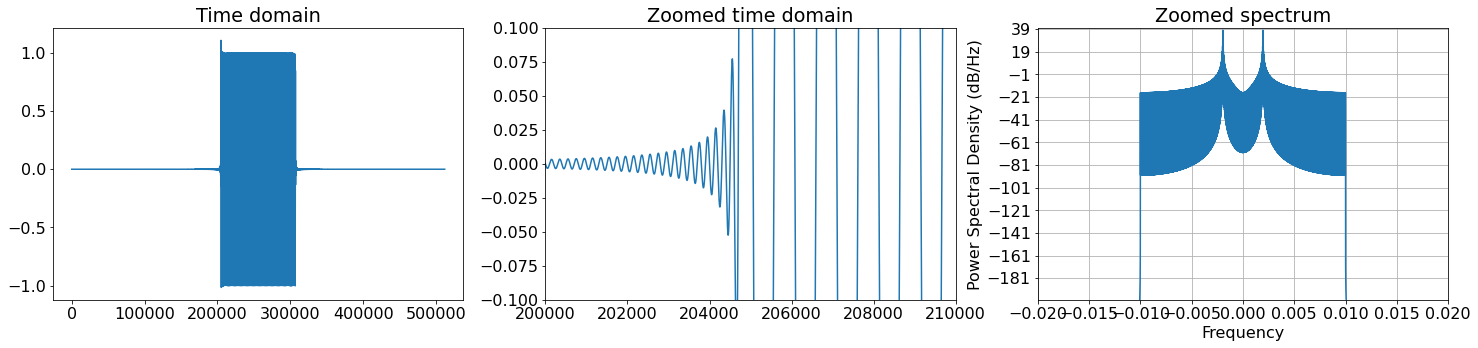

In [69]:
sig_pad=np.pad(STFT_block,pad*M)

sig_pad_us=upsample(sig_pad,N)  # signal first padded and then upsampled


fig,ax = plt.subplots(1, 3,figsize=(25,5))
ax[0].plot(sig_pad_us.real)
ax[0].set_title('Time domain')
ax[1].plot(sig_pad_us.real)
ax[1].set_ylim(-0.1,0.1)
ax[1].set_xlim(200000,210000)
ax[1].set_title('Zoomed time domain')
ax[2].psd(sig_pad_us,len(sig_pad_us))
plt.xlim(-0.02,0.02)
ax[2].set_ylim(-200,40)
ax[2].set_title('Zoomed spectrum')

# Hann shaped pulse

Text(0.5, 1.0, 'Zoomed spectrum')

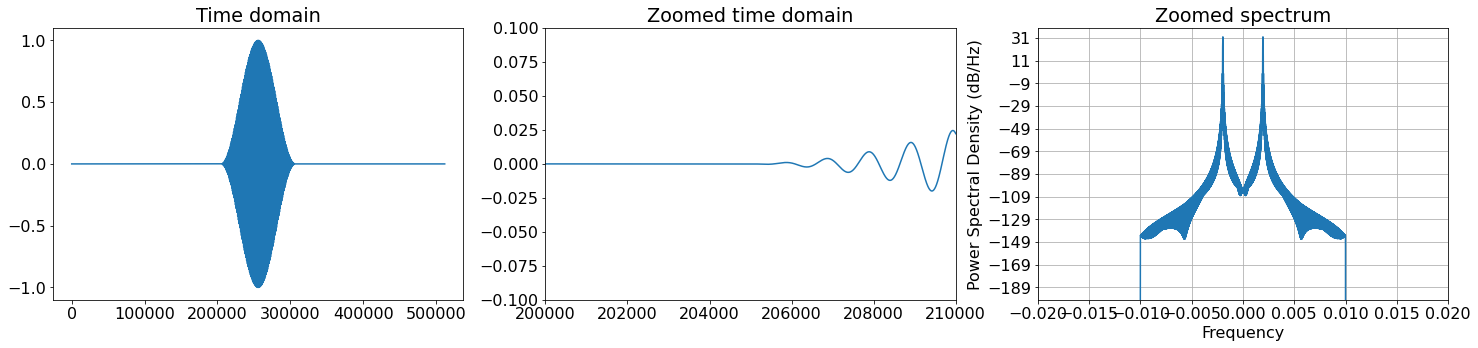

In [70]:
windowed=STFT_block*np.hanning(len(STFT_block))
windowed_pad=np.pad(windowed,pad*M)
hann_pad_us=upsample(windowed_pad,N)    # hann shaped pulse first padded and then upsampled


fig,ax = plt.subplots(1, 3,figsize=(25,5))
ax[0].plot(hann_pad_us.real)
ax[0].set_title('Time domain')
ax[1].plot(hann_pad_us.real)
ax[1].set_ylim(-0.1,0.1)
ax[1].set_xlim(200000,210000)
ax[1].set_title('Zoomed time domain')
ax[2].psd(hann_pad_us,len(hann_pad_us))
plt.xlim(-0.02,0.02)
ax[2].set_ylim(-200,40)
ax[2].set_title('Zoomed spectrum')

Text(0.5, 1.0, 'Remaining leakage with Hann shape and lowpass upsampling')

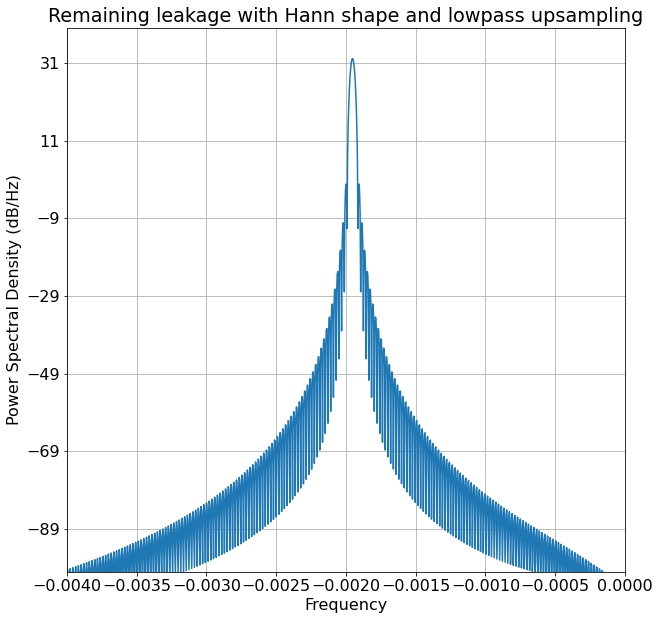

In [75]:
fig,ax = plt.subplots(1, 1,figsize=(10,10))
ax.psd(hann_pad_us,len(hann_pad_us))
ax.set_xlim(-0.004,0)
ax.set_ylim(-100,40)
ax.set_title('Remaining leakage with Hann shape and lowpass upsampling')